In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

!pip install mmcv-full
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir
!pip install "git+https://github.com/open-mmlab/cocoapi.git#subdirectory=pycocotools"

!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .
!pip install Pillow==7.0.0
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)
from mmcv.ops import get_compiling_cuda_version, get_compiler_version

print(get_compiling_cuda_version())
print(get_compiler_version())

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 704.4 MB 1.1 kB/s 
     |████████████████████████████████| 6.6 MB 33.5 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.5.1+cu101 which is incompatible.
     |████████████████████████████████| 313 kB 7.7 MB/s 
     |████████████████████████████████| 185 kB 49.9 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.13-cp37-cp37m-lin

1.5.1+cu101 False
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
2.16.0
not available
GCC 7.5


In [ ]:
!python tools/train.py configs/My_config.py

2021-09-13 10:18:26,574 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.11 (default, Jul  3 2021, 18:01:19) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla K80
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.1+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_7

In [ ]:
!python tools/test.py work_dirs/My_config/My_config.py work_dirs/My_config/latest.pth --show-dir "data/output"

/content/mmdetection/mmdet/datasets/api_wrappers/coco_api.py:22: UserWarning: mmpycocotools is deprecated. Please install official pycocotools by "pip install pycocotools"
  UserWarning)
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/20, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_leve

In [ ]:
!python tools/test.py work_dirs/My_config/My_config.py work_dirs/My_config/latest.pth --out "data/output.pkl"

/content/mmdetection/mmdet/datasets/api_wrappers/coco_api.py:22: UserWarning: mmpycocotools is deprecated. Please install official pycocotools by "pip install pycocotools"
  UserWarning)
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '
Use load_from_local loader
[                                                  ] 0/20, elapsed: 0s, ETA:/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_leve

In [ ]:
from mmdet.apis import init_detector, inference_detector
test_config = "configs/My_config.py"
#ckp_file = ""
ckp_file = "../drive/MyDrive/latest.pth"
model = init_detector(test_config, ckp_file, device='cpu')

/content/mmdetection/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [ ]:
img = 'data/test2017/0041.png'
result = inference_detector(model, img)

/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [ ]:
input_path = "data"
save_path = "../drive/MyDrive/MMD_mrcnn"

for i in os.listdir(input_path):
  result = inference_detector(model, os.path.join(input_path, i))
  with open(os.path.join(save_path, i[0:4] + '.pkl'), 'wb') as f:
    pickle.dump(result, f)

/content/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/content/mmdetection/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


In [ ]:
model_file_name = "../drive/MyDrive/MMD_mrcnn/0041.pkl"
result = 0
with open(model_file_name, 'rb') as f:
    result = pickle.load(f)

In [ ]:
print(len(result[1][0]))
print(result[0][0][0])

17
[179.68329   898.9995    320.0367    983.9999      0.9980684]


In [ ]:
num = 0
out_mask = np.zeros((1200,500))

for i in range(0, len(result[1][0])):
  app = True
  for j in range(0, len(result[1][0])):
    if j == i:
      continue
    else:
      if (result[0][0][j][1] < result[0][0][i][1]) and (result[0][0][j][3] > result[0][0][i][3]):
        app = False
  if app == True:
    num = num + 1
    out_mask = out_mask + result[1][0][i]

17


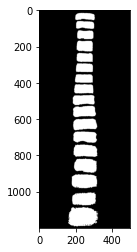

In [ ]:
for i in range(0, 1200):
  for j in range(0, 500):
    if out_mask[i][j]>0:
      out_mask[i][j] = 255
print(num)
plt.imshow(out_mask, cmap='gray')